In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Equation to simulate => y = 3x - 2

Steps involved:
 - Get your training data
 - Create the weights and biases
 - Create forward pass graph
 - Create training loop

In [106]:
m = -1.4
c = 1.2
# -1.4x -y + 1.2 = 0

x = np.random.normal(loc=0.5, scale=0.2, size=(300, 2))
x = torch.tensor(x, dtype=torch.float32)

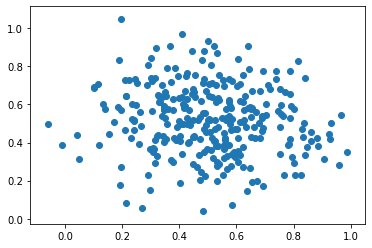

In [107]:
plt.scatter(x[:, 0], x[:, 1])
        

In [108]:
y = m * x[:, 0] - x[:, 1] + c
y[y > 0] = 1
y[y <= 0] = -1
y = torch.tensor(y, dtype=torch.float32).reshape((len(y), 1))
y.shape


d:\repos\justcode\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


torch.Size([300, 1])

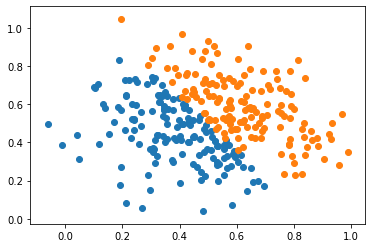

In [110]:
positive_indices = y[:, 0] > 0
negative_indices = y[:, 0] <= 0

x_positives = x[positive_indices]
x_negatives = x[negative_indices]

plt.scatter(x_positives[:, 0], x_positives[:, 1])
plt.scatter(x_negatives[:, 0], x_negatives[:, 1])
plt.show()

In [124]:
weights = torch.rand((2, 1), requires_grad=True, dtype=torch.float32)
biases = torch.rand(1, requires_grad=True)

weights, biases

(tensor([[0.7416],
         [0.9149]], requires_grad=True), tensor([0.2097], requires_grad=True))

In [123]:
learning_rate = 0.01
batch_size = 10

In [126]:
for epoch in range(200):
    print(f"\nEpoch = {epoch}")
    total_loss = 0
    for batch_i in range(0, len(x), batch_size):
        batch_x = x[batch_i: batch_i+batch_size]
        batch_y = y[batch_i: batch_i+batch_size]

        y_hat = torch.mm(batch_x, weights) + biases
        
        error = batch_y - y_hat
        loss = sum(error ** 2)
        total_loss += loss
        
        loss.backward()
        weights = weights - learning_rate * weights.grad
        biases = biases - learning_rate * biases.grad
        
        weights = weights.detach().requires_grad_()
        biases = biases.detach().requires_grad_()
    
    print(f"loss = {total_loss}")


Epoch = 0
loss = tensor([111.2969], grad_fn=<AddBackward0>)

Epoch = 1
loss = tensor([110.9555], grad_fn=<AddBackward0>)

Epoch = 2
loss = tensor([110.6906], grad_fn=<AddBackward0>)

Epoch = 3
loss = tensor([110.4855], grad_fn=<AddBackward0>)

Epoch = 4
loss = tensor([110.3270], grad_fn=<AddBackward0>)

Epoch = 5
loss = tensor([110.2049], grad_fn=<AddBackward0>)

Epoch = 6
loss = tensor([110.1112], grad_fn=<AddBackward0>)

Epoch = 7
loss = tensor([110.0394], grad_fn=<AddBackward0>)

Epoch = 8
loss = tensor([109.9848], grad_fn=<AddBackward0>)

Epoch = 9
loss = tensor([109.9434], grad_fn=<AddBackward0>)

Epoch = 10
loss = tensor([109.9123], grad_fn=<AddBackward0>)

Epoch = 11
loss = tensor([109.8890], grad_fn=<AddBackward0>)

Epoch = 12
loss = tensor([109.8719], grad_fn=<AddBackward0>)

Epoch = 13
loss = tensor([109.8594], grad_fn=<AddBackward0>)

Epoch = 14
loss = tensor([109.8504], grad_fn=<AddBackward0>)

Epoch = 15
loss = tensor([109.8441], grad_fn=<AddBackward0>)

Epoch = 16
loss =

In [127]:
weights, biases


(tensor([[-3.5734],
         [-2.7564]], requires_grad=True), tensor([3.3262], requires_grad=True))